In [1]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
encoder = Model(input_img, encoded)

In [6]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [8]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [9]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

11501568/11490434 [==============================] - 20s 2us/step


In [10]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print x_train.shape
print x_test.shape

(60000, 784)
(10000, 784)


In [11]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 76us/step - loss: 0.3673 - val_loss: 0.2720
Epoch 2/50
60000/60000 [==============================] - 4s 71us/step - loss: 0.2650 - val_loss: 0.2544
Epoch 3/50
60000/60000 [==============================] - 4s 70us/step - loss: 0.2441 - val_loss: 0.2317
Epoch 4/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.2240 - val_loss: 0.2143
Epoch 5/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.2093 - val_loss: 0.2019
Epoch 6/50
60000/60000 [==============================] - 4s 70us/step - loss: 0.1985 - val_loss: 0.1928
Epoch 7/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.1902 - val_loss: 0.1853
Epoch 8/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.1836 - val_loss: 0.1792
Epoch 9/50
60000/60000 [==============================] - 4s 69us/step - loss: 0.1777 - val_loss: 0.1736
Epoch

In [12]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

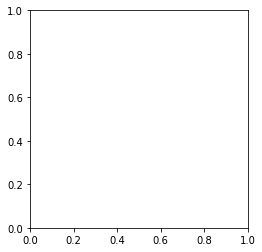

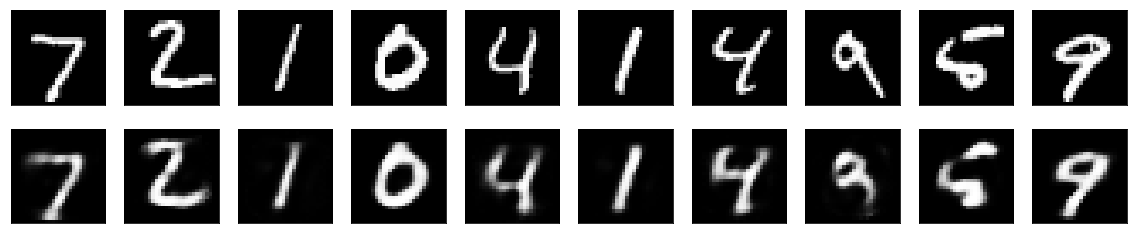

In [13]:
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [14]:
from keras import regularizers

encoding_dim = 32

input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [15]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [16]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 6s 108us/step - loss: 0.3297 - val_loss: 0.2623
Epoch 2/100
60000/60000 [==============================] - 6s 96us/step - loss: 0.2518 - val_loss: 0.2417
Epoch 3/100
60000/60000 [==============================] - 6s 105us/step - loss: 0.2323 - val_loss: 0.2185
Epoch 4/100
60000/60000 [==============================] - 5s 90us/step - loss: 0.2116 - val_loss: 0.2055
Epoch 5/100
60000/60000 [==============================] - 6s 93us/step - loss: 0.2002 - val_loss: 0.1950
Epoch 6/100
60000/60000 [==============================] - 6s 101us/step - loss: 0.1918 - val_loss: 0.1869
Epoch 7/100
60000/60000 [==============================] - 5s 88us/step - loss: 0.1830 - val_loss: 0.1789
Epoch 8/100
60000/60000 [==============================] - 6s 93us/step - loss: 0.1764 - val_loss: 0.1718
Epoch 9/100
60000/60000 [==============================] - 6s 98us/step - loss: 0.1712 - val_loss: 

Epoch 77/100
60000/60000 [==============================] - 6s 106us/step - loss: 0.1048 - val_loss: 0.1040
Epoch 78/100
60000/60000 [==============================] - 6s 101us/step - loss: 0.1046 - val_loss: 0.1044
Epoch 79/100
60000/60000 [==============================] - 7s 111us/step - loss: 0.1045 - val_loss: 0.1055
Epoch 80/100
60000/60000 [==============================] - 7s 111us/step - loss: 0.1042 - val_loss: 0.1044
Epoch 81/100
60000/60000 [==============================] - 6s 96us/step - loss: 0.1039 - val_loss: 0.1038
Epoch 82/100
60000/60000 [==============================] - 6s 100us/step - loss: 0.1037 - val_loss: 0.1021
Epoch 83/100
60000/60000 [==============================] - 5s 90us/step - loss: 0.1035 - val_loss: 0.1024
Epoch 84/100
60000/60000 [==============================] - 5s 86us/step - loss: 0.1032 - val_loss: 0.1022
Epoch 85/100
60000/60000 [==============================] - 5s 86us/step - loss: 0.1030 - val_loss: 0.1032
Epoch 86/100
60000/60000 [======

CNN

In [17]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [18]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format


In [23]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 129s 2ms/step - loss: 0.1458 - val_loss: 0.1408
Epoch 2/50
60000/60000 [==============================] - 69s 1ms/step - loss: 0.1371 - val_loss: 0.1317
Epoch 3/50
60000/60000 [==============================] - 66s 1ms/step - loss: 0.1309 - val_loss: 0.1256
Epoch 4/50
60000/60000 [==============================] - 66s 1ms/step - loss: 0.1261 - val_loss: 0.1249
Epoch 5/50
60000/60000 [==============================] - 66s 1ms/step - loss: 0.1224 - val_loss: 0.1225
Epoch 6/50
60000/60000 [==============================] - 65s 1ms/step - loss: 0.1197 - val_loss: 0.1163
Epoch 7/50
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1178 - val_loss: 0.1151
Epoch 8/50
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1160 - val_loss: 0.1138
Epoch 9/50
60000/60000 [==============================] - 64s 1ms/step - loss: 0.1147 - val_loss: 0.1122
Epoc

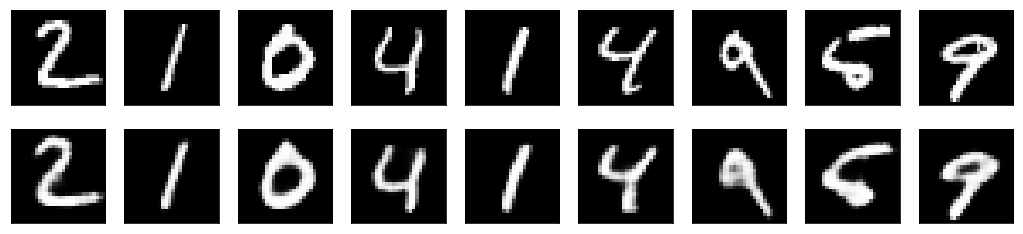

In [27]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1,10):
    # display original
    ax = plt.subplot(2, 10, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [31]:
n = 10
plt.figure(figsize=(20, 8))
for i in range(1,10):
    ax = plt.subplot(1, 10, i)
    plt.imshow(encoded_imgs[i].reshape(4, 4 * 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

ValueError: cannot reshape array of size 32 into shape (4,32)